In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = "../data/1- international-tourist-arrivals-by-region-of-origin.csv"

In [6]:
data = pd.read_csv(file_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    189 non-null    object 
 1   Code                                      0 non-null      float64
 2   Year                                      189 non-null    int64  
 3   International tourist arrivals by region  189 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.0+ KB


In [7]:
data.head()

,Entity,Code,Year,International tourist arrivals by region
0,Africa,NaN,1995,12832774.0
1,Africa,NaN,1996,14155691.0
2,Africa,NaN,1997,13967372.0
3,Africa,NaN,1998,15619527.0
4,Africa,NaN,1999,15523998.0


In [8]:
# Data Cleaning
data = data.dropna(axis=1, how='all')

In [10]:
# Change the name of columns for better readability
data.columns = ['Country', 'Year', 'Arrivals-by-region']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             189 non-null    object 
 1   Year                189 non-null    int64  
 2   Arrivals-by-region  189 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.6+ KB


In [13]:
# Check for missing values
data.isnull().sum()

Country               0
Year                  0
Arrivals-by-region    0
dtype: int64

In [15]:
# Exploratory Data Analysis (EDA)
print(data.describe()) # Get summary statistics 
print (data.info()) # Check data types

              Year  Arrivals-by-region
count   189.000000        1.890000e+02
mean   2008.000000        1.533321e+08
std       7.809569        2.071462e+08
min    1995.000000        4.779760e+06
25%    2001.000000        1.919970e+07
50%    2008.000000        3.778504e+07
75%    2015.000000        2.034073e+08
max    2021.000000        8.782535e+08
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             189 non-null    object 
 1   Year                189 non-null    int64  
 2   Arrivals-by-region  189 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.6+ KB
None


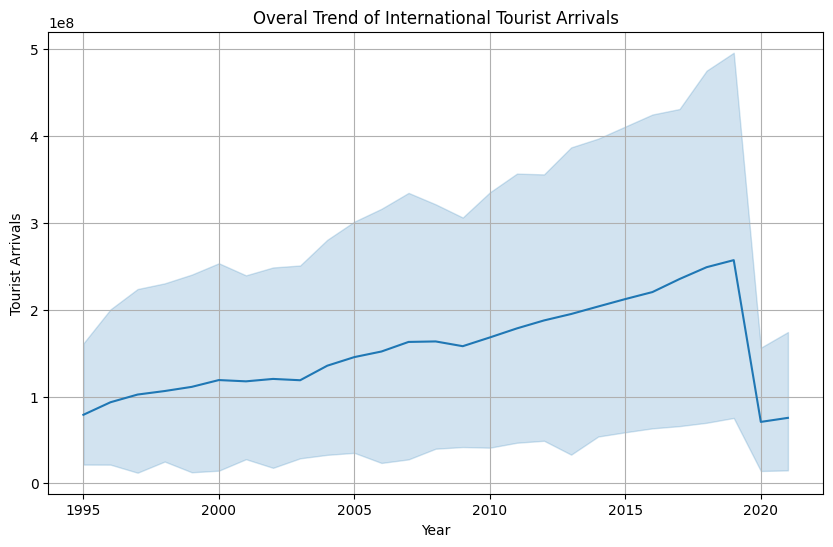

In [17]:
# Trend Analysis - Overal Trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Arrivals-by-region', data=data)
plt.title('Overal Trend of International Tourist Arrivals')
plt.xlabel('Year')
plt.ylabel('Tourist Arrivals')
plt.grid(True)
plt.show()

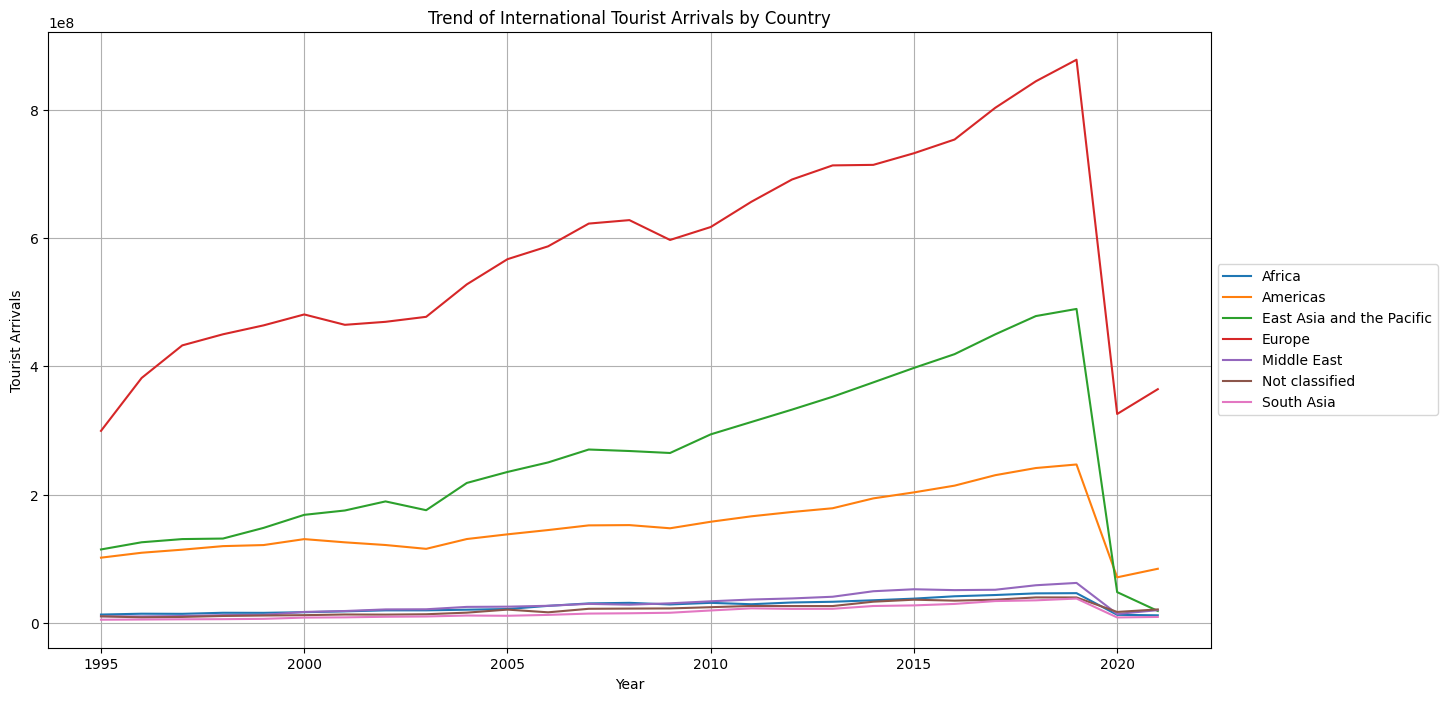

In [19]:
# Trend Analysis - By Country (Optional)
plt.figure(figsize=(15, 8))  # Adjust figure size for better visualization
sns.lineplot(x='Year', y='Arrivals-by-region', hue='Country', data=data)  # Use hue for different countries
plt.title('Trend of International Tourist Arrivals by Country')
plt.xlabel('Year')
plt.ylabel('Tourist Arrivals')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) # Place legend outside the plot
plt.grid(True)
plt.show()

In [20]:
# Aggregate data by year(total international tourist arrivals)
yearly_trend = data.groupby('Year')['Arrivals-by-region'].sum()

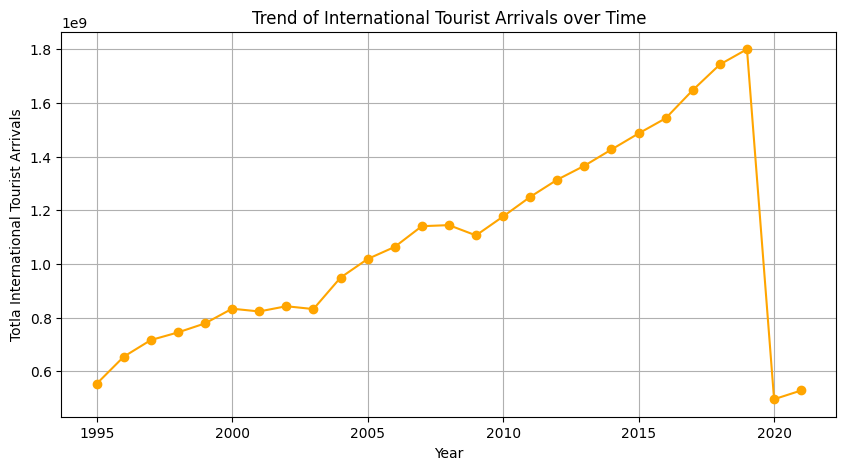

In [23]:
# Plot the trend of total international tourist arrivals over time
plt.figure(figsize=(10, 5))
plt.plot(yearly_trend.index, yearly_trend.values, marker="o", linestyle="-", color="orange")
plt.xlabel("Year")
plt.ylabel("Totla International Tourist Arrivals")
plt.title('Trend of International Tourist Arrivals over Time')
plt.grid(True)
plt.show()

In [24]:
# Aggregate Data by Region
region_comparison = data.groupby('Country')['Arrivals-by-region'].sum()

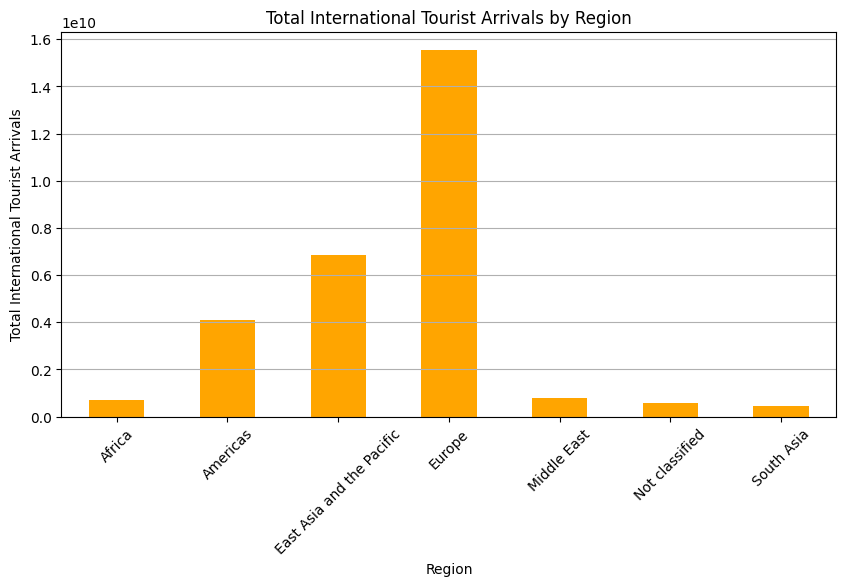

In [27]:
plt.figure(figsize=(10,5))
region_comparison.plot(kind="bar", color="orange")
plt.xlabel("Region")
plt.ylabel("Total International Tourist Arrivals")
plt.title("Total International Tourist Arrivals by Region")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [28]:
# Calculate the growth rate for each region
data_sorted = data.sort_values(by=["Country", "Year"])
data_sorted["Growth Rate"] = data_sorted.groupby("Country")["Arrivals-by-region"].pct_change() * 100


In [29]:
# Compute the average growth rate for each region
region_growth = data_sorted.groupby("Country")["Growth Rate"].mean().sort_values(ascending=False)


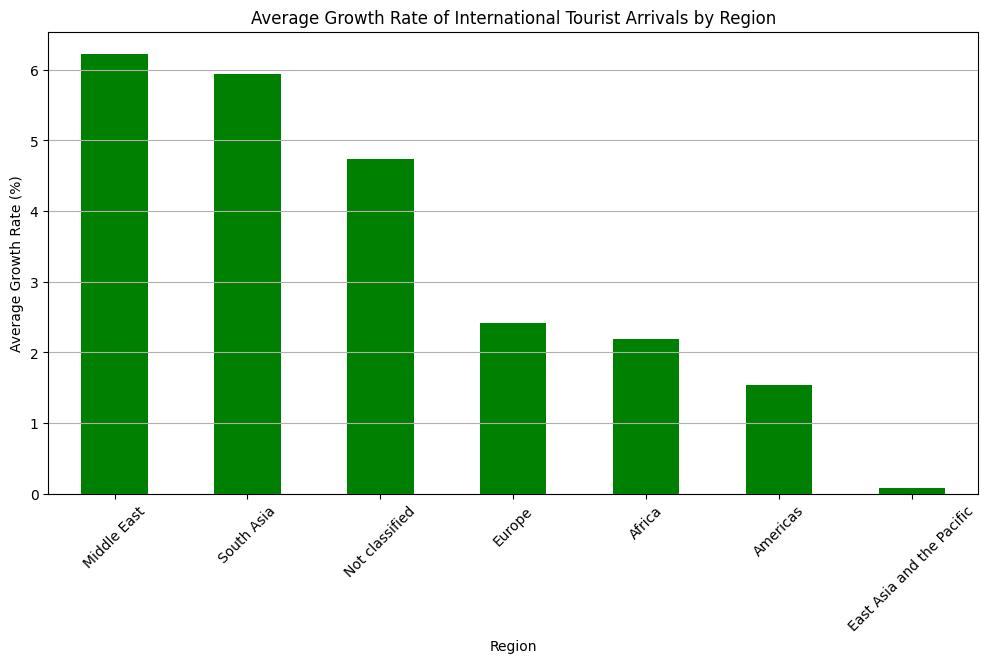

In [30]:
# Plot the average growth rate by region
plt.figure(figsize=(12, 6))
region_growth.plot(kind="bar", color="green")
plt.xlabel("Region")
plt.ylabel("Average Growth Rate (%)")
plt.title("Average Growth Rate of International Tourist Arrivals by Region")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()